<a href="https://colab.research.google.com/github/KansalNancy/KansalNancy.github.io/blob/main/Model1_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from PIL import Image
import os
import tensorflow as tf
from __future__ import division, print_function, absolute_import
import imageio
from skimage.transform import resize
import os
import traceback
import keras
import keras.backend as K
from keras.activations import sigmoid
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Convolution2D, MaxPooling2D, LeakyReLU, LSTM, TimeDistributed, Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras import metrics
from keras import backend as K
from keras import regularizers
from keras.callbacks import EarlyStopping
# from Resnet50_keras import ResNet50
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime
from collections import OrderedDict
import scipy.misc as misc
import matplotlib.pyplot as plt
import numpy as np
import h5py
import glob
import pandas as pd
import random
from PIL import Image, ImageOps

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from typing import Iterator, List, Union, Tuple
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model
from tensorflow.python.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import History
import tensorflow as tf
import datetime
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
pwd

'/content'

In [4]:
!unzip /content/drive/MyDrive/data1.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/data1/train/17549.npy  
  inflating: /content/__MACOSX/data1/train/._17549.npy  
  inflating: /content/data1/train/49353.npy  
  inflating: /content/__MACOSX/data1/train/._49353.npy  
  inflating: /content/data1/train/10226.npy  
  inflating: /content/__MACOSX/data1/train/._10226.npy  
  inflating: /content/data1/train/2761.npy  
  inflating: /content/__MACOSX/data1/train/._2761.npy  
  inflating: /content/data1/train/1268.npy  
  inflating: /content/__MACOSX/data1/train/._1268.npy  
  inflating: /content/data1/train/42206.npy  
  inflating: /content/__MACOSX/data1/train/._42206.npy  
  inflating: /content/data1/train/24183.npy  
  inflating: /content/__MACOSX/data1/train/._24183.npy  
  inflating: /content/data1/train/32939.npy  
  inflating: /content/__MACOSX/data1/train/._32939.npy  
  inflating: /content/data1/train/9634.npy  
  inflating: /content/__MACOSX/data1/train/._9634.npy  
  inflating: /content/data1/

In [5]:
imgname_train_A1 = np.array(glob.glob('/content/data1/train/*.npy'))

In [6]:
imgname_train_A1

array(['/content/data1/train/8728.npy', '/content/data1/train/35219.npy',
       '/content/data1/train/13427.npy', ...,
       '/content/data1/train/25269.npy', '/content/data1/train/18968.npy',
       '/content/data1/train/9526.npy'], dtype='<U30')

In [7]:
filelist_train_A1 = list(np.sort(imgname_train_A1.flat))

In [8]:
len(filelist_train_A1)

50000

In [9]:
filelist_train_A1[0][21:]

'0.npy'

In [10]:
filelist_train_A1_img = np.array([np.array(filelist_train_A1[h][21:]) for h in range(0,len(filelist_train_A1))])

In [11]:
filelist_train_A1_img.shape

(50000,)

In [12]:
x_train_A1 = np.array([np.load(fname) for fname in filelist_train_A1])

In [13]:
x_train_A1.shape

(50000, 32, 32, 3)

In [14]:
x_train_res_A1 = x_train_A1

In [15]:
x_train_all = x_train_res_A1

In [16]:
x_train_img =filelist_train_A1_img

In [39]:
x_train_img[0]

'0.npy'

In [18]:
counts_A1 = np.array([glob.glob('/content/data1/train_label.txt')])

In [19]:
counts_train_flat_A1 = list(counts_A1.flat)
train_labels_A1 = pd.DataFrame()
y_train_A1_list = []
for f in counts_train_flat_A1:
  frame = pd.read_csv(f, sep=" ", header=None)
  train_labels_A1 = train_labels_A1.append(frame, ignore_index=False)
all_labels_A1 = np.array(train_labels_A1)

for j in filelist_train_A1_img:
  arr_idx = np.where(all_labels_A1 == j)
  y_train_A1_list.append(all_labels_A1[arr_idx[0],:])
y_train_A1_labels = np.concatenate(y_train_A1_list, axis=0)

<ipython-input-19-34bac9a3c14f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_labels_A1 = train_labels_A1.append(frame, ignore_index=False)


In [20]:
all_labels_A1

array([['0.npy', 6],
       ['1.npy', 9],
       ['2.npy', 9],
       ...,
       ['49997.npy', 9],
       ['49998.npy', 1],
       ['49999.npy', 1]], dtype=object)

In [21]:
all_labels_A1.shape

(50000, 2)

In [22]:
y_train_A1_labels

array([['0.npy', 6],
       ['1.npy', 9],
       ['10.npy', 4],
       ...,
       ['9997.npy', 1],
       ['9998.npy', 1],
       ['9999.npy', 5]], dtype=object)

In [23]:
y_train_A1_labels.shape

(50000, 2)

In [24]:
y_train_all_labels = y_train_A1_labels

In [25]:
y_train_all = y_train_all_labels[:,1]

In [26]:
y_train_all.shape

(50000,)

In [27]:
y_train_all = np.array(y_train_all.astype(float))

In [28]:
y_train_all.shape

(50000,)

In [29]:
y_train_all

array([6., 9., 4., ..., 1., 1., 5.])

In [ ]:
# X_train, X_test, val_train, val_test = train_test_split(x_train_all, y_train_all, test_size=0.33, random_state=seed)

In [ ]:
# x_aug = ImageDataGenerator(
# 	    rotation_range=180,
# 	    width_shift_range=0.1,
# 	    height_shift_range=0.1,
# 	    horizontal_flip=True,
# 	    vertical_flip=True,
# 	    )

In [ ]:
# x_aug.fit(x_train_all)

In [31]:
%load_ext tensorboard

In [30]:
base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)

model = base_model.output
model = keras.layers.Flatten()(model)
model = keras.layers.Dense(128, activation=tf.keras.activations.relu)(model)
model = keras.layers.Dense(64, activation=tf.keras.activations.relu, activity_regularizer=tf.keras.regularizers.L2(
    l2=0.02))(model)
last_layer = keras.layers.Dense(10, activation=tf.keras.activations.softmax)(model)

model = keras.Model(inputs = base_model.input, outputs = last_layer, name="Project")

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy()
)

94765736/94765736 [==============================] - 1s 0us/step


In [32]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [33]:

history_r = model.fit(x_train_all, 
                      y_train_all, 
                      validation_split=0.33, 
                      batch_size = 100, 
                      epochs=30)
# history_r = model.fit(x_train_all, 
#                       y_train_all, 
#                       validation_split=0.33, 
#                       batch_size = 100, 
#                       epochs=2,
#                       callbacks=[tensorboard_callback])

Epoch 1/30
335/335 [==============================] - 69s 64ms/step - loss: 1.8625 - accuracy: 0.3959 - val_loss: 1.9743 - val_accuracy: 0.3318
Epoch 2/30
335/335 [==============================] - 21s 62ms/step - loss: 1.5992 - accuracy: 0.4701 - val_loss: 2.7644 - val_accuracy: 0.2547
Epoch 3/30
335/335 [==============================] - 21s 62ms/step - loss: 1.4035 - accuracy: 0.5408 - val_loss: 2.1470 - val_accuracy: 0.2382
Epoch 4/30
335/335 [==============================] - 21s 63ms/step - loss: 1.3610 - accuracy: 0.5500 - val_loss: 1.7409 - val_accuracy: 0.4099
Epoch 5/30
335/335 [==============================] - 21s 64ms/step - loss: 1.2397 - accuracy: 0.5984 - val_loss: 1.3929 - val_accuracy: 0.5492
Epoch 6/30
335/335 [==============================] - 21s 64ms/step - loss: 1.2319 - accuracy: 0.5923 - val_loss: 1.6915 - val_accuracy: 0.4281
Epoch 7/30
335/335 [==============================] - 22s 64ms/step - loss: 1.2566 - accuracy: 0.5801 - val_loss: 1.4627 - val_accuracy:

In [34]:
!pip install tensorflow
!pip install tensorboard


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
%cd /content/logs/fit

[Errno 2] No such file or directory: '/content/logs/fit'
/content


In [ ]:
!tensorboard dev upload --logdir ./ --name "My Experiment"


2023-03-16 05:49:40.667993: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-16 05:49:40.668128: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-16 05:49:40.668152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./

This TensorBoard will be visib

In [ ]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


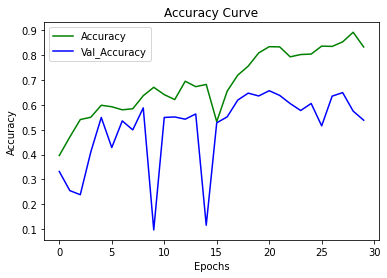

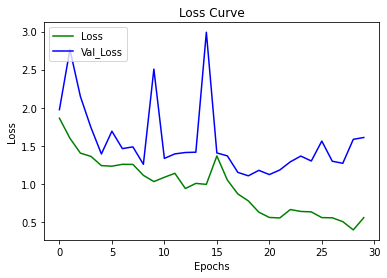

In [36]:
accuracy = history_r.history['accuracy']
val_accuracy = history_r.history['val_accuracy']
epochs = range(1,20)
plt.plot(accuracy, 'g', label='accuracy')
plt.plot(val_accuracy, 'b', label='val_accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()


loss = history_r.history['loss']
val_loss = history_r.history['val_loss']
epochs = range(1,30)
plt.plot(loss, 'g', label='loss')
plt.plot(val_loss, 'b', label='val_loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [37]:
base_model = tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)

model = base_model.output
model = keras.layers.Flatten()(model)
model = keras.layers.Dense(128, activation=tf.keras.activations.relu)(model)
model = keras.layers.Dense(64, activation=tf.keras.activations.relu, activity_regularizer=tf.keras.regularizers.L2(
    l2=0.02))(model)
last_layer = keras.layers.Dense(10, activation=tf.keras.activations.softmax)(model)

model = keras.Model(inputs = base_model.input, outputs = last_layer, name="Project")

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy()
)

258076736/258076736 [==============================] - 3s 0us/step


In [38]:
history_e = model.fit(x_train_all, y_train_all, validation_split=0.33, batch_size = 100, epochs=30)

Epoch 1/30
335/335 [==============================] - 201s 216ms/step - loss: 1.8121 - accuracy: 0.4050 - val_loss: 1.7219 - val_accuracy: 0.4625
Epoch 2/30
335/335 [==============================] - 57s 169ms/step - loss: 1.3756 - accuracy: 0.5729 - val_loss: 1.2942 - val_accuracy: 0.6169
Epoch 3/30
335/335 [==============================] - 56s 168ms/step - loss: 1.1603 - accuracy: 0.6481 - val_loss: 1.3920 - val_accuracy: 0.5681
Epoch 4/30
335/335 [==============================] - 56s 166ms/step - loss: 0.9972 - accuracy: 0.7073 - val_loss: 1.1390 - val_accuracy: 0.6605
Epoch 5/30
335/335 [==============================] - 57s 171ms/step - loss: 0.8300 - accuracy: 0.7632 - val_loss: 1.0179 - val_accuracy: 0.6932
Epoch 6/30
335/335 [==============================] - 58s 174ms/step - loss: 0.7932 - accuracy: 0.7707 - val_loss: 1.0121 - val_accuracy: 0.6948
Epoch 7/30
335/335 [==============================] - 56s 168ms/step - loss: 0.6927 - accuracy: 0.8050 - val_loss: 1.0755 - val_a

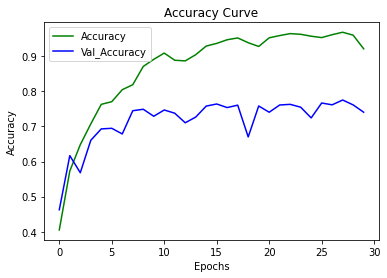

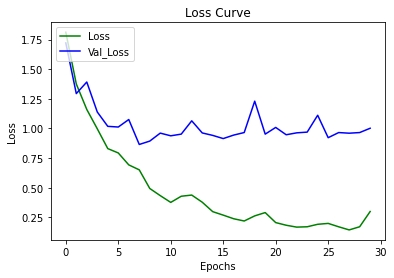

In [40]:
accuracy = history_e.history['accuracy']
val_accuracy = history_e.history['val_accuracy']
epochs = range(1,20)
plt.plot(accuracy, 'g', label='accuracy')
plt.plot(val_accuracy, 'b', label='val_accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()


loss = history_e.history['loss']
val_loss = history_e.history['val_loss']
epochs = range(1,20)
plt.plot(loss, 'g', label='loss')
plt.plot(val_loss, 'b', label='val_loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [41]:
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)

model = base_model.output
model = keras.layers.Flatten()(model)
model = keras.layers.Dense(128, activation=tf.keras.activations.relu)(model)
model = keras.layers.Dense(64, activation=tf.keras.activations.relu, activity_regularizer=tf.keras.regularizers.L2(
    l2=0.02))(model)
last_layer = keras.layers.Dense(10, activation=tf.keras.activations.softmax)(model)

model = keras.Model(inputs = base_model.input, outputs = last_layer, name="Project")

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy()
)

16705208/16705208 [==============================] - 0s 0us/step


In [42]:
history_e0 = model.fit(x_train_all, y_train_all, validation_split=0.33, batch_size = 100, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
335/335 [==============================] - 57s 57ms/step - loss: 1.9521 - accuracy: 0.3540 - val_loss: 1.7434 - val_accuracy: 0.4487
Epoch 2/20
335/335 [==============================] - 16s 48ms/step - loss: 1.5331 - accuracy: 0.5087 - val_loss: 1.4270 - val_accuracy: 0.5504
Epoch 3/20
335/335 [==============================] - 17s 51ms/step - loss: 1.3014 - accuracy: 0.5938 - val_loss: 1.2730 - val_accuracy: 0.5982
Epoch 4/20
335/335 [==============================] - 17s 51ms/step - loss: 1.1400 - accuracy: 0.6488 - val_loss: 1.1728 - val_accuracy: 0.6352
Epoch 5/20
335/335 [==============================] - 17s 51ms/step - loss: 1.0199 - accuracy: 0.6876 - val_loss: 1.1207 - val_accuracy: 0.6465
Epoch 6/20
335/335 [==============================] - 17s 50ms/step - loss: 0.9095 - accuracy: 0.7281 - val_loss: 1.0894 - val_accuracy: 0.6602
Epoch 7/20
335/335 [==============================] - 17s 50ms/step - loss: 0.8195 - accuracy: 0.7538 - val_loss: 1.1435 - val_accuracy:

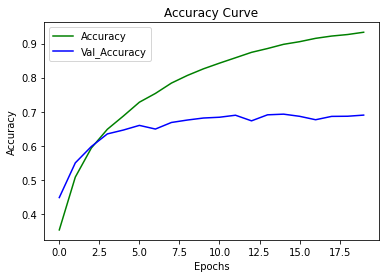

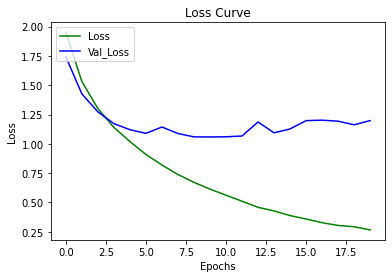

In [43]:
accuracy = history_e0.history['accuracy']
val_accuracy = history_e0.history['val_accuracy']
epochs = range(1,20)
plt.plot(accuracy, 'g', label='accuracy')
plt.plot(val_accuracy, 'b', label='val_accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()


loss = history_e0.history['loss']
val_loss = history_e0.history['val_loss']
epochs = range(1,20)
plt.plot(loss, 'g', label='loss')
plt.plot(val_loss, 'b', label='val_loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [44]:
imgname_test_A1 = np.array(glob.glob('/content/data1/test/*.npy'))

In [45]:
filelist_test_A1 = list(np.sort(imgname_test_A1.flat))

In [46]:
len(filelist_test_A1)

10000

In [48]:
filelist_test_A1[0][20:]

'0.npy'

In [49]:
filelist_test_A1_img = np.array([np.array(filelist_test_A1[h][20:]) for h in range(0,len(filelist_test_A1))])

In [50]:
filelist_test_A1_img.shape

(10000,)

In [51]:
x_test_A1 = np.array([np.load(fname) for fname in filelist_test_A1])

In [52]:
x_test_A1.shape

(10000, 32, 32, 3)

In [53]:
x_test_res_A1 = x_test_A1

In [54]:
x_test_all = x_test_res_A1

In [55]:
x_test_img =filelist_test_A1_img

In [56]:
x_test_img

array(['0.npy', '1.npy', '10.npy', ..., '9997.npy', '9998.npy',
       '9999.npy'], dtype='<U8')

In [43]:
# # read lines from the text file
# with open('/content/data1/test_label.txt', 'r') as f:
#     lines = f.read().splitlines()

# # split each line into the image name and the label
# labels = []
# for line in lines:
#     image_name, label = line.split()
#     labels.append(label)

# # convert labels to a NumPy array
# labels_array = np.array(labels)


In [44]:
# labels_array.shape

(10000,)

In [45]:
# labels_array

array(['3', '8', '8', ..., '5', '1', '7'], dtype='<U1')

In [57]:
counts_A2 = np.array([glob.glob('/content/data1/test_label.txt')])
counts_test_flat_A1 = list(counts_A2.flat)
test_labels_A1 = pd.DataFrame()
y_test_A1_list = []
for f in counts_test_flat_A1:
  frame = pd.read_csv(f, sep=" ", header=None)
  test_labels_A1 = test_labels_A1.append(frame, ignore_index=False)
all_labels_A1 = np.array(test_labels_A1)

for j in filelist_test_A1_img:
  arr_idx = np.where(all_labels_A1 == j)
  y_test_A1_list.append(all_labels_A1[arr_idx[0],:])
y_test_A1_labels = np.concatenate(y_test_A1_list, axis=0)

<ipython-input-57-4f92273bacc5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_labels_A1 = test_labels_A1.append(frame, ignore_index=False)


In [58]:
all_labels_A1

array([['0.npy', 3],
       ['1.npy', 8],
       ['2.npy', 8],
       ...,
       ['9997.npy', 5],
       ['9998.npy', 1],
       ['9999.npy', 7]], dtype=object)

In [59]:
all_labels_A1.shape

(10000, 2)

In [60]:
y_test_A1_labels

array([['0.npy', 3],
       ['1.npy', 8],
       ['10.npy', 0],
       ...,
       ['9997.npy', 5],
       ['9998.npy', 1],
       ['9999.npy', 7]], dtype=object)

In [61]:
y_test_A1_labels.shape

(10000, 2)

In [62]:
y_test_all_labels = y_test_A1_labels

In [63]:
y_test_all = y_test_all_labels[:,1]

In [64]:
y_test_all.shape

(10000,)

In [65]:
y_test_all = np.array(y_test_all.astype(float))

In [66]:
y_test_all

array([3., 8., 0., ..., 5., 1., 7.])

In [67]:
y_test_all.shape

(10000,)

In [74]:
predicted_labels = []
for batch_images in x_test_all:
    batch_predictions = model.predict(batch_images)
    predicted_labels.extend(np.argmax(batch_predictions, axis=1))

# Compare with actual labels
actual_labels = y_test_all
accuracy = np.mean(predicted_labels == actual_labels)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 70ms/step


In [77]:
accuracy = accuracy_score(actual_labels, predicted_labels)

In [78]:
accuracy

0.6817